# Peer-graded Assignment: Эксперименты с моделью

На прошлой неделе вы поучаствовали в соревновании на kaggle и, наверняка, большинство успешно справилось с прохождением baseline, а значит пора двигаться дальше - заняться оптимизацией модели, провести серию экспериментов и построить сильное финальное решения.

В этом задании вам нужно провести ряд эскпериментов, оценить качество полученных в процессе экспериментирования моделей и выбрать лучшее решение. 

Задание будет оцениваться на основании загруженного jupyther notebook и развернутых ответов на поставленные вопросы.

## Инструкции

1\. Начнем с простого. Давайте оценим как много объектов действительно нужно для построения качественной модели. Для обучения доступна достаточно большая выборка и может так оказаться, что начиная с некоторого момента рост размера обучающей выборки перестает влиять на качество модели. Постройте кривые обучения, обучая модель на выборках разного размера начиная с небольшого количество объектов в обучающей выборке и постепенно наращивая её размер с некоторым шагом. Обратите внимание на `sklearn.model_selection.learning_curve`

In [4]:
# подгружаем все необходимые модули
import pandas as pd
import numpy as np
#import sklearn as skl
import matplotlib as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import model_selection, linear_model, preprocessing, ensemble, metrics, svm, manifold
from sklearn.metrics import average_precision_score, roc_auc_score
from sklearn.utils import shuffle
from sklearn.model_selection import cross_validate, KFold, StratifiedKFold
import xgboost as xgb
from sklearn.model_selection import learning_curve
import lightgbm as lgb
from sklearn.svm import LinearSVC
#from sklearn.cross_validate import KFold
%pylab inline


Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['plt', 'shuffle']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [5]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [6]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler 
from imblearn.over_sampling import RandomOverSampler

In [7]:
# oversampling
def oversampling(data):
    X = data.iloc[:, 0:230].values
    y = data.iloc[:, -1].values
    #X = data.fillna(0)
    os =  RandomOverSampler(sampling_strategy='minority')
    X_new, y_new = os.fit_resample(X, y)
    x_data = pd.DataFrame(X_new, columns = ['Var1','Var2','Var3','Var4','Var5','Var6','Var7','Var8','Var9','Var10','Var11','Var12',
                                    'Var13','Var14','Var15','Var16','Var17','Var18','Var19','Var20','Var21','Var22','Var23',
                                    'Var24','Var25','Var26','Var27','Var28','Var29','Var30','Var31','Var32','Var33','Var34',
                                    'Var35','Var36','Var37','Var38','Var39','Var40','Var41','Var42','Var43','Var44','Var45',
                                    'Var46','Var47','Var48','Var49','Var50','Var51','Var52','Var53','Var54','Var55','Var56',
                                    'Var57','Var58','Var59','Var60','Var61','Var62','Var63','Var64','Var65','Var66','Var67',
                                    'Var68','Var69','Var70','Var71','Var72','Var73','Var74','Var75','Var76','Var77','Var78',
                                    'Var79','Var80','Var81','Var82','Var83','Var84','Var85','Var86','Var87','Var88','Var89',
                                    'Var90','Var91','Var92','Var93','Var94','Var95','Var96','Var97','Var98','Var99','Var100',
                                    'Var101','Var102','Var103','Var104','Var105','Var106','Var107','Var108','Var109','Var110',
                                    'Var111','Var112','Var113','Var114','Var115','Var116','Var117','Var118','Var119','Var120',
                                    'Var121','Var122','Var123','Var124','Var125','Var126','Var127','Var128','Var129','Var130',
                                    'Var131','Var132','Var133','Var134','Var135','Var136','Var137','Var138','Var139','Var140',
                                    'Var141','Var142','Var143','Var144','Var145','Var146','Var147','Var148','Var149','Var150',
                                    'Var151','Var152','Var153','Var154','Var155','Var156','Var157','Var158','Var159','Var160',
                                    'Var161','Var162','Var163','Var164','Var165','Var166','Var167','Var168','Var169','Var170',
                                    'Var171','Var172','Var173','Var174','Var175','Var176','Var177','Var178','Var179','Var180',
                                    'Var181','Var182','Var183','Var184','Var185','Var186','Var187','Var188','Var189','Var190',
                                    'Var191','Var192','Var193','Var194','Var195','Var196','Var197','Var198','Var199','Var200',
                                    'Var201','Var202','Var203','Var204','Var205','Var206','Var207','Var208','Var209','Var210',
                                    'Var211','Var212','Var213','Var214','Var215','Var216','Var217','Var218','Var219','Var220',
                                    'Var221','Var222','Var223','Var224','Var225','Var226','Var227','Var228','Var229','Var230'
                                           ])
    y_data = pd.DataFrame(y_new, columns = ['labels'])

# undersampling
def undersampling(data):
    X = data.iloc[:, 0:230].values
    y = data.iloc[:, -1].values
   #X = data.fillna(0)
    os =  RandomUnderSampler(sampling_strategy='majority')
    X_new, y_new = os.fit_resample(X, y)
    x_data = pd.DataFrame(X_new, columns = ['Var1','Var2','Var3','Var4','Var5','Var6','Var7','Var8','Var9','Var10','Var11','Var12',
                                    'Var13','Var14','Var15','Var16','Var17','Var18','Var19','Var20','Var21','Var22','Var23',
                                    'Var24','Var25','Var26','Var27','Var28','Var29','Var30','Var31','Var32','Var33','Var34',
                                    'Var35','Var36','Var37','Var38','Var39','Var40','Var41','Var42','Var43','Var44','Var45',
                                    'Var46','Var47','Var48','Var49','Var50','Var51','Var52','Var53','Var54','Var55','Var56',
                                    'Var57','Var58','Var59','Var60','Var61','Var62','Var63','Var64','Var65','Var66','Var67',
                                    'Var68','Var69','Var70','Var71','Var72','Var73','Var74','Var75','Var76','Var77','Var78',
                                    'Var79','Var80','Var81','Var82','Var83','Var84','Var85','Var86','Var87','Var88','Var89',
                                    'Var90','Var91','Var92','Var93','Var94','Var95','Var96','Var97','Var98','Var99','Var100',
                                    'Var101','Var102','Var103','Var104','Var105','Var106','Var107','Var108','Var109','Var110',
                                    'Var111','Var112','Var113','Var114','Var115','Var116','Var117','Var118','Var119','Var120',
                                    'Var121','Var122','Var123','Var124','Var125','Var126','Var127','Var128','Var129','Var130',
                                    'Var131','Var132','Var133','Var134','Var135','Var136','Var137','Var138','Var139','Var140',
                                    'Var141','Var142','Var143','Var144','Var145','Var146','Var147','Var148','Var149','Var150',
                                    'Var151','Var152','Var153','Var154','Var155','Var156','Var157','Var158','Var159','Var160',
                                    'Var161','Var162','Var163','Var164','Var165','Var166','Var167','Var168','Var169','Var170',
                                    'Var171','Var172','Var173','Var174','Var175','Var176','Var177','Var178','Var179','Var180',
                                    'Var181','Var182','Var183','Var184','Var185','Var186','Var187','Var188','Var189','Var190',
                                    'Var191','Var192','Var193','Var194','Var195','Var196','Var197','Var198','Var199','Var200',
                                    'Var201','Var202','Var203','Var204','Var205','Var206','Var207','Var208','Var209','Var210',
                                    'Var211','Var212','Var213','Var214','Var215','Var216','Var217','Var218','Var219','Var220',
                                    'Var221','Var222','Var223','Var224','Var225','Var226','Var227','Var228','Var229','Var230'
                                           ])
    y_data = pd.DataFrame(y_new, columns = ['labels'])

In [8]:
# замена пропусков модой определённого в признаке
def fillNaMostFreq(data):
    for i in data:
        if size(data[i].value_counts()>0):
            mostFreq = data[i].value_counts().index[0]
            data[i] = data[i].fillna(mostFreq)
        else:
            data[i] = data[i].fillna(0)
    return data
# замена пропусков в числовых признаках матожиданием, в категориальных - модой
def fillNaMixed1(data):
    for i in range(190):
        mean = np.mean(data.iloc[:,i])
        data.iloc[:,i] = data.iloc[:,i].fillna(mean)
    for i in range(190,230):
        if size(data.iloc[:,i].value_counts()>0):
            mostFreq = data.iloc[:,i].value_counts().index[0]
            data.iloc[:,i] = data.iloc[:,i].fillna(mostFreq)
        else:
            data.iloc[:,i] = data.iloc[:,i].fillna(0)
    return data
# замена пропусков в числовых признаках нулями, в категориальных - модой
def fillNaMixed2(data):
    data.iloc[:,:190] = data.iloc[:,:190].fillna(0)
    for i in range(190,230):
        if size(data.iloc[:,i].value_counts()>0):
            mostFreq = data.iloc[:,i].value_counts().index[0]
            data.iloc[:,i] = data.iloc[:,i].fillna(mostFreq)
        else:
            data.iloc[:,i] = data.iloc[:,i].fillna(0)
    return data
# замена пропусков в числовых признаках матожиданием, если количество уникальных значений больше 200, в ином случае - модой
# в категориальных - модой
def fillNaMixed3(data):
    for i in range(190):
        if len(np.unique(data.iloc[:,i]))>200:
            mean = np.mean(data.iloc[:,i])
            data.iloc[:,i] = data.iloc[:,i].fillna(mean)
        else:
            mostFreq = data.iloc[:,i].value_counts().index[0]
            data.iloc[:,i] = data.iloc[:,i].fillna(mostFreq)
    for i in range(190,230):
        if size(data.iloc[:,i].value_counts()>0):
            mostFreq = data.iloc[:,i].value_counts().index[0]
            data.iloc[:,i] = data.iloc[:,i].fillna(mostFreq)
        else:
            data.iloc[:,i] = data.iloc[:,i].fillna(0)
    return data
# умолчанию всё зануляем

In [9]:
# preprocessing.LabelEncoder для преобразования катагориальных переменных
def labelEncoder(data):
    data = data.fillna(0)
    le = preprocessing.LabelEncoder()
    for m in range(190,230):
        le.fit(data.iloc[:,m].astype(str))
        data.iloc[:,m] = le.transform(data.iloc[:,m].astype(str))       
    return data


# удаление неинформативных переменных, в которых во всех строках одно и то же значение
def dropUninformative(data):
    df = pd.DataFrame([])
    for i in range(data.shape[1]):
        if len(np.unique(data.iloc[:,i]))>1:
            df["Var"+str(i)] = data.iloc[:,i]
    return df
# отбор наиболее информативных признаков
def featureImportance(estimator, data):
    fig = plt.figure(figsize=(20, 70))
    ax = fig.add_subplot(111)

    df_f = pd.DataFrame(estimator.feature_importances_, columns=["importance"])
    df_f["labels"] = data.columns.values
    df_f.sort_values("importance", inplace=True, ascending=False)
    display(df_f.head(90))

    index = np.arange(90)
    bar_width = 0.5
    rects = plt.barh(index , df_f["importance"][:90], bar_width, alpha=0.4, color='b', label='Main')
    plt.yticks(index, df_f["labels"])
    plt.show()
    return df_f

In [10]:
# кросс-валидация ведется с помощью StratifiedKFold
def KFold(estimator, x_data, y_data, w):
    weights = map(lambda x: w[0] if x == 1 else w[1], y_data['labels'].values)
    weights_class = pd.DataFrame(weights)
    skf = StratifiedKFold(n_splits=4)
    y_tests = pd.DataFrame()
    proba = pd.DataFrame()
    n = 0
    for train_index, test_index in skf.split(x_data, y_data):
        estimator.fit(x_data.iloc[train_index, :], y_data.iloc[train_index, 0], sample_weight=weights_class.iloc[train_index,0])
        proba['fold_'+str(n)] = estimator.predict_proba(x_data.iloc[test_index, :])[:,1]
        y_tests['fold_'+str(n)] = y_data.iloc[test_index, 0].values
        n+=1
    return  proba, y_tests



# AUC_PRC
def PRC(y_sores, y_tests):
    plt.figure(figsize = (7,7))
    mean_PR = np.array([])
    n = 0
    for i, j in zip(y_scores, y_tests):
        precision, recall, _ = metrics.precision_recall_curve(y_tests[i], y_scores[j])
        average_precision = metrics.average_precision_score(y_tests[i], y_scores[j])
        mean_PR = np.append(mean_PR, average_precision)
        plt.plot(recall, precision, color='b', alpha=0.5, label='PR fold '+str(n) + ' (score = %0.2f)' % average_precision)
        plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
        n+=1
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.legend(loc="upper right")
    plt.title('2-class Precision-Recall curve: Mean PR={0:0.3f}'.format(mean_PR.mean()))
    plt.show()
    
# AUC_ROC  
def ROC(y_scores, y_test):
    plt.figure(figsize = (7,7))
    Mean_ROC = np.array([])
    n = 0
    for i, j in zip(y_scores, y_tests):
        fpr, tpr, thresholds = metrics.roc_curve(y_tests[i], y_scores[j])
        roc_auc = metrics.auc(fpr, tpr)
        lw = 2
        Mean_ROC = np.append(Mean_ROC, roc_auc)
        plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC fold '+str(n)+' (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        n += 1
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.title('2-class ROC curve: Mean ROC area={0:0.3f}'.format(Mean_ROC.mean()))
    plt.show()


In [11]:
from sklearn.utils import shuffle
train_data = pd.read_csv('Train_full.csv', sep =',')
train_data = shuffle(train_data, random_state = 27)
x_data = train_data.iloc[:,:230]
y_data = train_data.iloc[:,230:]
x_data = labelEncoder(x_data)
x_data = dropUninformative(x_data)
print (x_data.shape)

(40000, 212)


In [12]:
# качество обучения AUC ROC
def score(estimator, X, y):
    proba = estimator.predict_proba(X)[:,1]
    fpr, tpr, thresholds = metrics.roc_curve(y.values, proba)
    roc_auc = metrics.auc(fpr, tpr)
    return roc_auc

In [13]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 10)):
    plt.figure(figsize=(20,10))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=3, n_jobs=n_jobs, train_sizes=train_sizes,
                                                            scoring=score)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="b")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot([0, 30000], [train_scores_mean[9], train_scores_mean[9]], '--', color="black")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="b",
             label="Cross-validation score")
    plt.plot([0, 30000], [test_scores_mean[9], test_scores_mean[9]], '--', color="black")
    plt.legend(loc="best")
   
    return plt

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

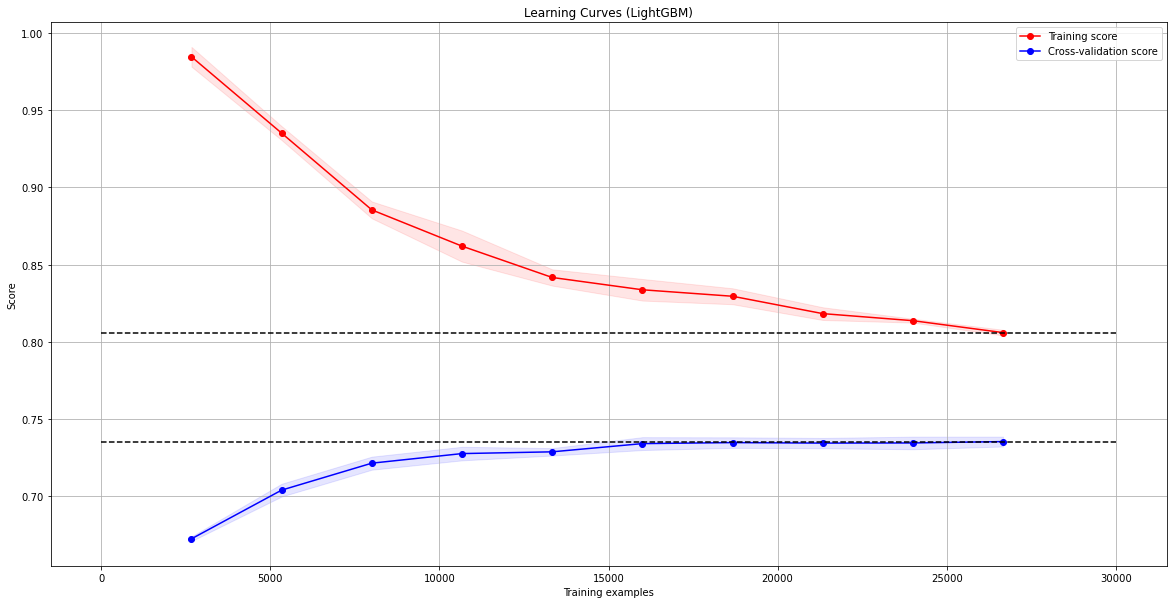

In [14]:
estimator = lgb.LGBMClassifier(max_depth=3)
title = "Learning Curves (LightGBM)"
plot_learning_curve(estimator, title, x_data, y_data['labels'], cv=3)

#### в районе количества 16000 качество на кросс-валидации практически не растёт, но все же растет.

2\. Часто несбалансированные по классам выборки приводят к различным проблемам при обучении моделей. Давайте попробуем по-разному обработать выборку, поиграть с распределением объектов по классам и сделать выводы о том, как соотношение классов влияет на качество модели.

2.1\. Задайте веса объектам так, чтобы соотношение классов с учетом весов объектов изменилось. Попробуйте не менее трёх различных вариантов весов. Меняются ли результаты классификации? Как это сказывается на качестве модели? Какой вариант выглядит наиболее оптимальным с точки зрения качества?

churn weight: 1.3
no churn weight: 0.7


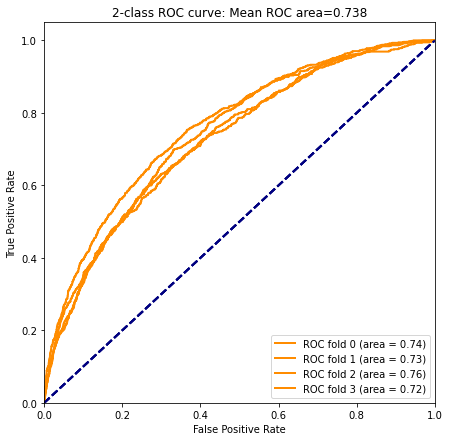

Wall time: 7.84 s


In [15]:
%%time

x_data = train_data.iloc[:,:230]
y_data = train_data.iloc[:,230:]
x_data = labelEncoder(x_data)
x_data = dropUninformative(x_data)

weights = [1.3,0.7]
print ('churn weight: '+ str(weights[0]) + '\nno churn weight: '+str(weights[1]))

gbm = lgb.LGBMClassifier(max_depth=3)
y_scores, y_tests = KFold(gbm, x_data, y_data, weights)
ROC(y_scores, y_tests)

churn weight: 1.0
no churn weight: 1.0


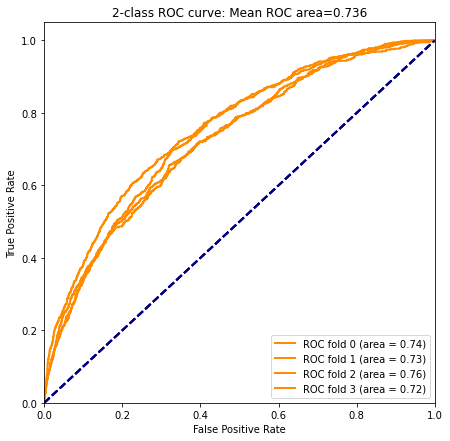

Wall time: 8.91 s


In [16]:
%%time

x_data = train_data.iloc[:,:230]
y_data = train_data.iloc[:,230:]
x_data = labelEncoder(x_data)
x_data = dropUninformative(x_data)

weights = [1.,1.]
print ('churn weight: '+ str(weights[0]) + '\nno churn weight: '+str(weights[1]))

gbm = lgb.LGBMClassifier(max_depth=3)
y_scores, y_tests = KFold(gbm, x_data, y_data, weights)
ROC(y_scores, y_tests)

churn weight: 1.0
no churn weight: 1.0


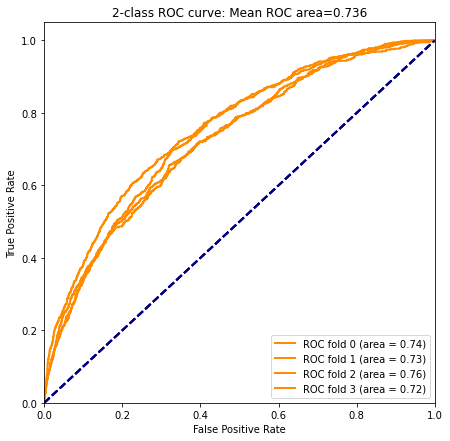

Wall time: 7.34 s


In [17]:
%%time

x_data = train_data.iloc[:,:230]
y_data = train_data.iloc[:,230:]
x_data = labelEncoder(x_data)
x_data = dropUninformative(x_data)

weights = [1.,1.]
print ('churn weight: '+ str(weights[0]) + '\nno churn weight: '+str(weights[1]))

gbm = lgb.LGBMClassifier(max_depth=3)
y_scores, y_tests = KFold(gbm, x_data, y_data, weights)
ROC(y_scores, y_tests)

#### Изменения соотношения классов с учетом весов не особо влияют на качество работы моделей. В дальнейшем оставлю соотношение весов 1:1.

2.2\. Примените к выборке технологию undersampling: для этого нужно убрать из обучения некоторое количество объектов большего класса таким образом, чтобы соотношение классов изменилось. Попробуйте не менее трёх различных вариантов undersampling (варианты могут отличаться как по количество отфильтрованных объектов, так и по принципу выборка объектов для отсеивания из выборки). Меняются ли результаты классификации? Как это сказывается на качестве модели? Какой вариант выглядит наиболее оптимальным с точки зрения качества?

#### Cоотношение классов как в исходнике.

churn weight: 1.0
no churn weight: 1.0


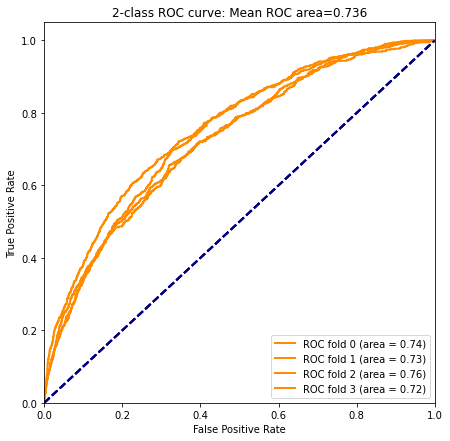

Wall time: 7.34 s


In [18]:
%%time

x_data = train_data.iloc[:,:230]
y_data = train_data.iloc[:,230:]
x_data = labelEncoder(x_data)
x_data = dropUninformative(x_data)

weights = [1.,1.]
print ('churn weight: '+ str(weights[0]) + '\nno churn weight: '+str(weights[1]))

gbm = lgb.LGBMClassifier(max_depth=3)
y_scores, y_tests = KFold(gbm, x_data, y_data, weights)
ROC(y_scores, y_tests)

#### Соотношение 1:10

churn weight: 1.0
no churn weight: 1.0


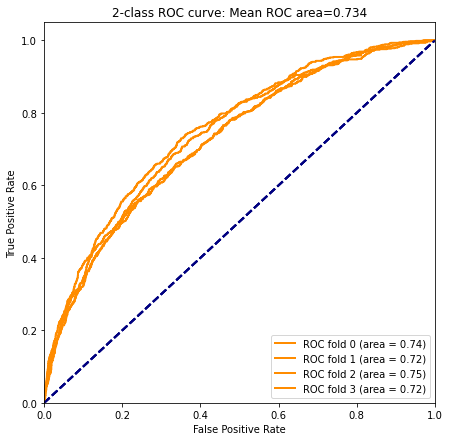

Wall time: 15.3 s


In [19]:
%%time

X = train_data.iloc[:, 0:230].values
y = train_data.iloc[:, -1].values
   #X = data.fillna(0)
os =  RandomUnderSampler(sampling_strategy=0.1)
X_new, y_new = os.fit_resample(X, y)
x_data = pd.DataFrame(X_new, columns = ['Var1','Var2','Var3','Var4','Var5','Var6','Var7','Var8','Var9','Var10','Var11','Var12',
                                    'Var13','Var14','Var15','Var16','Var17','Var18','Var19','Var20','Var21','Var22','Var23',
                                    'Var24','Var25','Var26','Var27','Var28','Var29','Var30','Var31','Var32','Var33','Var34',
                                    'Var35','Var36','Var37','Var38','Var39','Var40','Var41','Var42','Var43','Var44','Var45',
                                    'Var46','Var47','Var48','Var49','Var50','Var51','Var52','Var53','Var54','Var55','Var56',
                                    'Var57','Var58','Var59','Var60','Var61','Var62','Var63','Var64','Var65','Var66','Var67',
                                    'Var68','Var69','Var70','Var71','Var72','Var73','Var74','Var75','Var76','Var77','Var78',
                                    'Var79','Var80','Var81','Var82','Var83','Var84','Var85','Var86','Var87','Var88','Var89',
                                    'Var90','Var91','Var92','Var93','Var94','Var95','Var96','Var97','Var98','Var99','Var100',
                                    'Var101','Var102','Var103','Var104','Var105','Var106','Var107','Var108','Var109','Var110',
                                    'Var111','Var112','Var113','Var114','Var115','Var116','Var117','Var118','Var119','Var120',
                                    'Var121','Var122','Var123','Var124','Var125','Var126','Var127','Var128','Var129','Var130',
                                    'Var131','Var132','Var133','Var134','Var135','Var136','Var137','Var138','Var139','Var140',
                                    'Var141','Var142','Var143','Var144','Var145','Var146','Var147','Var148','Var149','Var150',
                                    'Var151','Var152','Var153','Var154','Var155','Var156','Var157','Var158','Var159','Var160',
                                    'Var161','Var162','Var163','Var164','Var165','Var166','Var167','Var168','Var169','Var170',
                                    'Var171','Var172','Var173','Var174','Var175','Var176','Var177','Var178','Var179','Var180',
                                    'Var181','Var182','Var183','Var184','Var185','Var186','Var187','Var188','Var189','Var190',
                                    'Var191','Var192','Var193','Var194','Var195','Var196','Var197','Var198','Var199','Var200',
                                    'Var201','Var202','Var203','Var204','Var205','Var206','Var207','Var208','Var209','Var210',
                                    'Var211','Var212','Var213','Var214','Var215','Var216','Var217','Var218','Var219','Var220',
                                    'Var221','Var222','Var223','Var224','Var225','Var226','Var227','Var228','Var229','Var230'
                                           ])
y_data = pd.DataFrame(y_new, columns = ['labels'])
x_data = labelEncoder(x_data)
x_data = dropUninformative(x_data)

weights = [1.,1.]
print ('churn weight: '+ str(weights[0]) + '\nno churn weight: '+str(weights[1]))
gbm = lgb.LGBMClassifier(max_depth=3)
y_scores, y_tests = KFold(gbm, x_data, y_data, weights)
ROC(y_scores, y_tests)

#### Cоотношение 1:5

churn weight: 1.0
no churn weight: 1.0


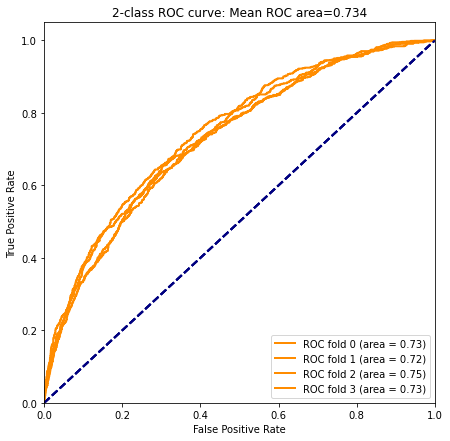

Wall time: 7.2 s


In [20]:
%%time

X = train_data.iloc[:, 0:230].values
y = train_data.iloc[:, -1].values
   #X = data.fillna(0)
os =  RandomUnderSampler(sampling_strategy=0.2)
X_new, y_new = os.fit_resample(X, y)
x_data = pd.DataFrame(X_new, columns = ['Var1','Var2','Var3','Var4','Var5','Var6','Var7','Var8','Var9','Var10','Var11','Var12',
                                    'Var13','Var14','Var15','Var16','Var17','Var18','Var19','Var20','Var21','Var22','Var23',
                                    'Var24','Var25','Var26','Var27','Var28','Var29','Var30','Var31','Var32','Var33','Var34',
                                    'Var35','Var36','Var37','Var38','Var39','Var40','Var41','Var42','Var43','Var44','Var45',
                                    'Var46','Var47','Var48','Var49','Var50','Var51','Var52','Var53','Var54','Var55','Var56',
                                    'Var57','Var58','Var59','Var60','Var61','Var62','Var63','Var64','Var65','Var66','Var67',
                                    'Var68','Var69','Var70','Var71','Var72','Var73','Var74','Var75','Var76','Var77','Var78',
                                    'Var79','Var80','Var81','Var82','Var83','Var84','Var85','Var86','Var87','Var88','Var89',
                                    'Var90','Var91','Var92','Var93','Var94','Var95','Var96','Var97','Var98','Var99','Var100',
                                    'Var101','Var102','Var103','Var104','Var105','Var106','Var107','Var108','Var109','Var110',
                                    'Var111','Var112','Var113','Var114','Var115','Var116','Var117','Var118','Var119','Var120',
                                    'Var121','Var122','Var123','Var124','Var125','Var126','Var127','Var128','Var129','Var130',
                                    'Var131','Var132','Var133','Var134','Var135','Var136','Var137','Var138','Var139','Var140',
                                    'Var141','Var142','Var143','Var144','Var145','Var146','Var147','Var148','Var149','Var150',
                                    'Var151','Var152','Var153','Var154','Var155','Var156','Var157','Var158','Var159','Var160',
                                    'Var161','Var162','Var163','Var164','Var165','Var166','Var167','Var168','Var169','Var170',
                                    'Var171','Var172','Var173','Var174','Var175','Var176','Var177','Var178','Var179','Var180',
                                    'Var181','Var182','Var183','Var184','Var185','Var186','Var187','Var188','Var189','Var190',
                                    'Var191','Var192','Var193','Var194','Var195','Var196','Var197','Var198','Var199','Var200',
                                    'Var201','Var202','Var203','Var204','Var205','Var206','Var207','Var208','Var209','Var210',
                                    'Var211','Var212','Var213','Var214','Var215','Var216','Var217','Var218','Var219','Var220',
                                    'Var221','Var222','Var223','Var224','Var225','Var226','Var227','Var228','Var229','Var230'
                                           ])
y_data = pd.DataFrame(y_new, columns = ['labels'])
x_data = labelEncoder(x_data)
x_data = dropUninformative(x_data)

weights = [1.,1.]
print ('churn weight: '+ str(weights[0]) + '\nno churn weight: '+str(weights[1]))
gbm = lgb.LGBMClassifier(max_depth=3)
y_scores, y_tests = KFold(gbm, x_data, y_data, weights)
ROC(y_scores, y_tests)

#### соотношение 1:3

churn weight: 1.0
no churn weight: 1.0


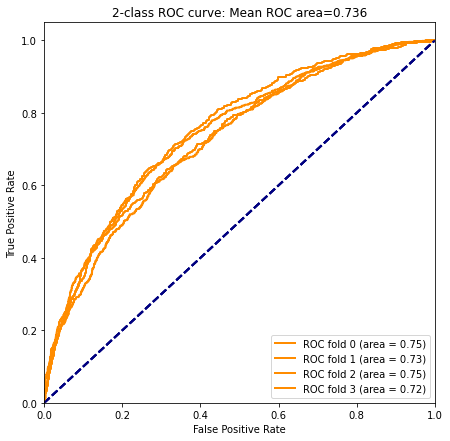

Wall time: 4.91 s


In [21]:
%%time

X = train_data.iloc[:, 0:230].values
y = train_data.iloc[:, -1].values
   #X = data.fillna(0)
os =  RandomUnderSampler(sampling_strategy=0.3)
X_new, y_new = os.fit_resample(X, y)
x_data = pd.DataFrame(X_new, columns = ['Var1','Var2','Var3','Var4','Var5','Var6','Var7','Var8','Var9','Var10','Var11','Var12',
                                    'Var13','Var14','Var15','Var16','Var17','Var18','Var19','Var20','Var21','Var22','Var23',
                                    'Var24','Var25','Var26','Var27','Var28','Var29','Var30','Var31','Var32','Var33','Var34',
                                    'Var35','Var36','Var37','Var38','Var39','Var40','Var41','Var42','Var43','Var44','Var45',
                                    'Var46','Var47','Var48','Var49','Var50','Var51','Var52','Var53','Var54','Var55','Var56',
                                    'Var57','Var58','Var59','Var60','Var61','Var62','Var63','Var64','Var65','Var66','Var67',
                                    'Var68','Var69','Var70','Var71','Var72','Var73','Var74','Var75','Var76','Var77','Var78',
                                    'Var79','Var80','Var81','Var82','Var83','Var84','Var85','Var86','Var87','Var88','Var89',
                                    'Var90','Var91','Var92','Var93','Var94','Var95','Var96','Var97','Var98','Var99','Var100',
                                    'Var101','Var102','Var103','Var104','Var105','Var106','Var107','Var108','Var109','Var110',
                                    'Var111','Var112','Var113','Var114','Var115','Var116','Var117','Var118','Var119','Var120',
                                    'Var121','Var122','Var123','Var124','Var125','Var126','Var127','Var128','Var129','Var130',
                                    'Var131','Var132','Var133','Var134','Var135','Var136','Var137','Var138','Var139','Var140',
                                    'Var141','Var142','Var143','Var144','Var145','Var146','Var147','Var148','Var149','Var150',
                                    'Var151','Var152','Var153','Var154','Var155','Var156','Var157','Var158','Var159','Var160',
                                    'Var161','Var162','Var163','Var164','Var165','Var166','Var167','Var168','Var169','Var170',
                                    'Var171','Var172','Var173','Var174','Var175','Var176','Var177','Var178','Var179','Var180',
                                    'Var181','Var182','Var183','Var184','Var185','Var186','Var187','Var188','Var189','Var190',
                                    'Var191','Var192','Var193','Var194','Var195','Var196','Var197','Var198','Var199','Var200',
                                    'Var201','Var202','Var203','Var204','Var205','Var206','Var207','Var208','Var209','Var210',
                                    'Var211','Var212','Var213','Var214','Var215','Var216','Var217','Var218','Var219','Var220',
                                    'Var221','Var222','Var223','Var224','Var225','Var226','Var227','Var228','Var229','Var230'
                                           ])
y_data = pd.DataFrame(y_new, columns = ['labels'])
x_data = labelEncoder(x_data)
x_data = dropUninformative(x_data)

weights = [1.,1.]
print ('churn weight: '+ str(weights[0]) + '\nno churn weight: '+str(weights[1]))
gbm = lgb.LGBMClassifier(max_depth=3)
y_scores, y_tests = KFold(gbm, x_data, y_data, weights)
ROC(y_scores, y_tests)

#### Cоотношение 1:2.

churn weight: 1.0
no churn weight: 1.0


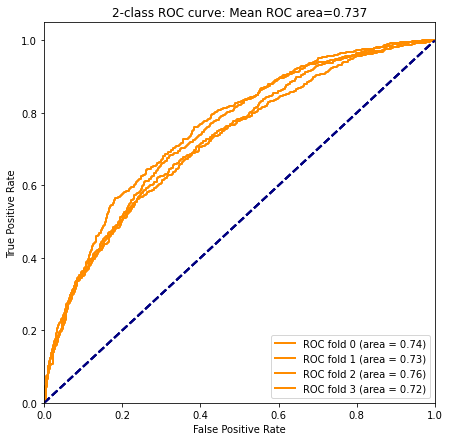

Wall time: 3.82 s


In [22]:
%%time

X = train_data.iloc[:, 0:230].values
y = train_data.iloc[:, -1].values
   #X = data.fillna(0)
os =  RandomUnderSampler(sampling_strategy=0.5)
X_new, y_new = os.fit_resample(X, y)
x_data = pd.DataFrame(X_new, columns = ['Var1','Var2','Var3','Var4','Var5','Var6','Var7','Var8','Var9','Var10','Var11','Var12',
                                    'Var13','Var14','Var15','Var16','Var17','Var18','Var19','Var20','Var21','Var22','Var23',
                                    'Var24','Var25','Var26','Var27','Var28','Var29','Var30','Var31','Var32','Var33','Var34',
                                    'Var35','Var36','Var37','Var38','Var39','Var40','Var41','Var42','Var43','Var44','Var45',
                                    'Var46','Var47','Var48','Var49','Var50','Var51','Var52','Var53','Var54','Var55','Var56',
                                    'Var57','Var58','Var59','Var60','Var61','Var62','Var63','Var64','Var65','Var66','Var67',
                                    'Var68','Var69','Var70','Var71','Var72','Var73','Var74','Var75','Var76','Var77','Var78',
                                    'Var79','Var80','Var81','Var82','Var83','Var84','Var85','Var86','Var87','Var88','Var89',
                                    'Var90','Var91','Var92','Var93','Var94','Var95','Var96','Var97','Var98','Var99','Var100',
                                    'Var101','Var102','Var103','Var104','Var105','Var106','Var107','Var108','Var109','Var110',
                                    'Var111','Var112','Var113','Var114','Var115','Var116','Var117','Var118','Var119','Var120',
                                    'Var121','Var122','Var123','Var124','Var125','Var126','Var127','Var128','Var129','Var130',
                                    'Var131','Var132','Var133','Var134','Var135','Var136','Var137','Var138','Var139','Var140',
                                    'Var141','Var142','Var143','Var144','Var145','Var146','Var147','Var148','Var149','Var150',
                                    'Var151','Var152','Var153','Var154','Var155','Var156','Var157','Var158','Var159','Var160',
                                    'Var161','Var162','Var163','Var164','Var165','Var166','Var167','Var168','Var169','Var170',
                                    'Var171','Var172','Var173','Var174','Var175','Var176','Var177','Var178','Var179','Var180',
                                    'Var181','Var182','Var183','Var184','Var185','Var186','Var187','Var188','Var189','Var190',
                                    'Var191','Var192','Var193','Var194','Var195','Var196','Var197','Var198','Var199','Var200',
                                    'Var201','Var202','Var203','Var204','Var205','Var206','Var207','Var208','Var209','Var210',
                                    'Var211','Var212','Var213','Var214','Var215','Var216','Var217','Var218','Var219','Var220',
                                    'Var221','Var222','Var223','Var224','Var225','Var226','Var227','Var228','Var229','Var230'
                                           ])
y_data = pd.DataFrame(y_new, columns = ['labels'])
x_data = labelEncoder(x_data)
x_data = dropUninformative(x_data)

weights = [1.,1.]
print ('churn weight: '+ str(weights[0]) + '\nno churn weight: '+str(weights[1]))
gbm = lgb.LGBMClassifier(max_depth=3)
y_scores, y_tests = KFold(gbm, x_data, y_data, weights)
ROC(y_scores, y_tests)

#### Cоотношение 1:1.

churn weight: 1.0
no churn weight: 1.0


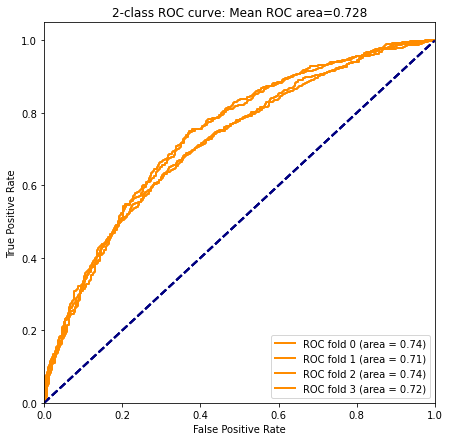

Wall time: 2.77 s


In [23]:
%%time

X = train_data.iloc[:, 0:230].values
y = train_data.iloc[:, -1].values
   #X = data.fillna(0)
os =  RandomUnderSampler(sampling_strategy='majority')
X_new, y_new = os.fit_resample(X, y)
x_data = pd.DataFrame(X_new, columns = ['Var1','Var2','Var3','Var4','Var5','Var6','Var7','Var8','Var9','Var10','Var11','Var12',
                                    'Var13','Var14','Var15','Var16','Var17','Var18','Var19','Var20','Var21','Var22','Var23',
                                    'Var24','Var25','Var26','Var27','Var28','Var29','Var30','Var31','Var32','Var33','Var34',
                                    'Var35','Var36','Var37','Var38','Var39','Var40','Var41','Var42','Var43','Var44','Var45',
                                    'Var46','Var47','Var48','Var49','Var50','Var51','Var52','Var53','Var54','Var55','Var56',
                                    'Var57','Var58','Var59','Var60','Var61','Var62','Var63','Var64','Var65','Var66','Var67',
                                    'Var68','Var69','Var70','Var71','Var72','Var73','Var74','Var75','Var76','Var77','Var78',
                                    'Var79','Var80','Var81','Var82','Var83','Var84','Var85','Var86','Var87','Var88','Var89',
                                    'Var90','Var91','Var92','Var93','Var94','Var95','Var96','Var97','Var98','Var99','Var100',
                                    'Var101','Var102','Var103','Var104','Var105','Var106','Var107','Var108','Var109','Var110',
                                    'Var111','Var112','Var113','Var114','Var115','Var116','Var117','Var118','Var119','Var120',
                                    'Var121','Var122','Var123','Var124','Var125','Var126','Var127','Var128','Var129','Var130',
                                    'Var131','Var132','Var133','Var134','Var135','Var136','Var137','Var138','Var139','Var140',
                                    'Var141','Var142','Var143','Var144','Var145','Var146','Var147','Var148','Var149','Var150',
                                    'Var151','Var152','Var153','Var154','Var155','Var156','Var157','Var158','Var159','Var160',
                                    'Var161','Var162','Var163','Var164','Var165','Var166','Var167','Var168','Var169','Var170',
                                    'Var171','Var172','Var173','Var174','Var175','Var176','Var177','Var178','Var179','Var180',
                                    'Var181','Var182','Var183','Var184','Var185','Var186','Var187','Var188','Var189','Var190',
                                    'Var191','Var192','Var193','Var194','Var195','Var196','Var197','Var198','Var199','Var200',
                                    'Var201','Var202','Var203','Var204','Var205','Var206','Var207','Var208','Var209','Var210',
                                    'Var211','Var212','Var213','Var214','Var215','Var216','Var217','Var218','Var219','Var220',
                                    'Var221','Var222','Var223','Var224','Var225','Var226','Var227','Var228','Var229','Var230'
                                           ])
y_data = pd.DataFrame(y_new, columns = ['labels'])
x_data = labelEncoder(x_data)
x_data = dropUninformative(x_data)

weights = [1.,1.]
print ('churn weight: '+ str(weights[0]) + '\nno churn weight: '+str(weights[1]))
gbm = lgb.LGBMClassifier(max_depth=3)
y_scores, y_tests = KFold(gbm, x_data, y_data, weights)
ROC(y_scores, y_tests)

#### Лучший результат модели с соотношением классов как в исходнике и 1:5. Но в принципе, разница несущественна. Поэтому оставлю как есть в исходнике.

3\. Теперь перейдем к работе с признаками. Ранее вы реализовали несколько стратегий для обработки пропущенных значений. Сравните эти стратегии между собой с помощью оценки качества моделей кросс-валидации, построенных на датасетах с использованием различных стратегий. Как обработка пропущенных значений сказывается на качестве модели? Какой вариант выглядит наиболее оптимальным с точки зрения качества?

#### Замена пропусков в числовых признаках матожиданием, в категориальных - модой

churn weight: 1.0
no churn weight: 1.0


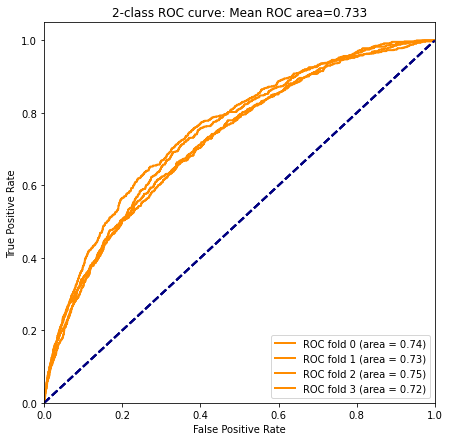

Wall time: 8.3 s


In [24]:
%%time

x_data = train_data.iloc[:,:230]
y_data = train_data.iloc[:,230:]
X_data = fillNaMixed1(x_data)
x_data = labelEncoder(x_data)
x_data = dropUninformative(x_data)

weights = [1.,1.]
print ('churn weight: '+ str(weights[0]) + '\nno churn weight: '+str(weights[1]))
gbm = lgb.LGBMClassifier(max_depth=3)
y_scores, y_tests = KFold(gbm, x_data, y_data, weights)
ROC(y_scores, y_tests)

#### Замена пропусков в числовых признаках нулями, в категориальных - модой

churn weight: 1.0
no churn weight: 1.0


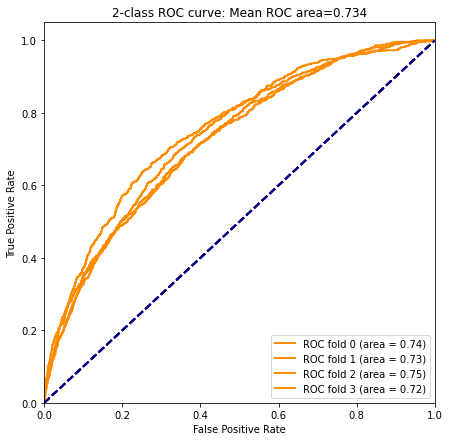

Wall time: 6.96 s


In [25]:
%%time

x_data = train_data.iloc[:,:230]
y_data = train_data.iloc[:,230:]
X_data = fillNaMixed2(x_data)
x_data = labelEncoder(x_data)
x_data = dropUninformative(x_data)

weights = [1.,1.]
print ('churn weight: '+ str(weights[0]) + '\nno churn weight: '+str(weights[1]))
gbm = lgb.LGBMClassifier(max_depth=3)
y_scores, y_tests = KFold(gbm, x_data, y_data, weights)
ROC(y_scores, y_tests)

#### Замена пропусков в числовых признаках матожиданием, если уникальных > 200, иначе - модой. В категориальных модой.

churn weight: 1.0
no churn weight: 1.0


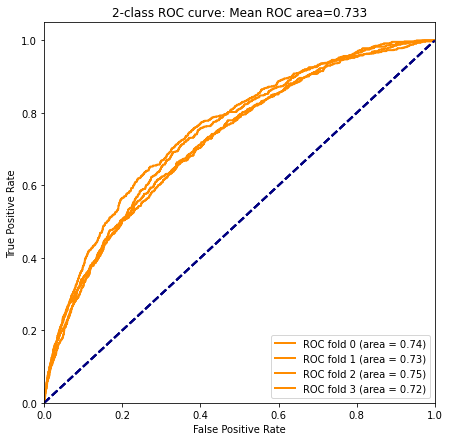

Wall time: 10.6 s


In [26]:
%%time
x_data = train_data.iloc[:,:230]
y_data = train_data.iloc[:,230:]
X_data = fillNaMixed3(x_data)
x_data = labelEncoder(x_data)
x_data = dropUninformative(x_data)

weights = [1.,1.]
print ('churn weight: '+ str(weights[0]) + '\nno churn weight: '+str(weights[1]))
gbm = lgb.LGBMClassifier(max_depth=3)
y_scores, y_tests = KFold(gbm, x_data, y_data, weights)
ROC(y_scores, y_tests)

#### Замена пропусков модой.

churn weight: 1.0
no churn weight: 1.0


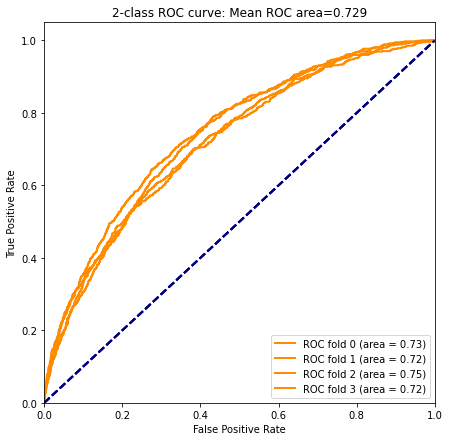

Wall time: 10.5 s


In [27]:
%%time

x_data = train_data.iloc[:,:230]
y_data = train_data.iloc[:,230:]
x_data = fillNaMostFreq(x_data)
x_data = labelEncoder(x_data)
x_data = dropUninformative(x_data)

weights = [1.,1.]
print ('churn weight: '+ str(weights[0]) + '\nno churn weight: '+str(weights[1]))
gbm = lgb.LGBMClassifier(max_depth=3)
y_scores, y_tests = KFold(gbm, x_data, y_data, weights)
ROC(y_scores, y_tests)

#### Замена пропусков нулями.

churn weight: 1.0
no churn weight: 1.0


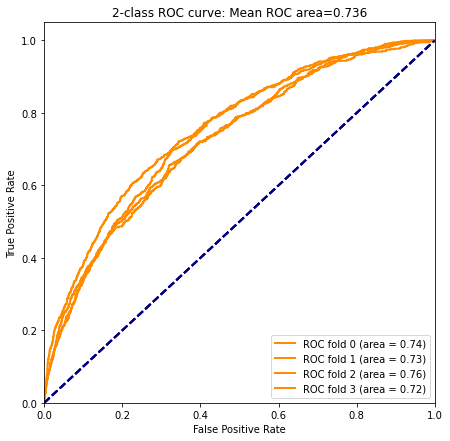

Wall time: 9.66 s


In [28]:
%%time

x_data = train_data.iloc[:,:230]
y_data = train_data.iloc[:,230:]
x_data = labelEncoder(x_data)
x_data = dropUninformative(x_data)

weights = [1.,1.]
print ('churn weight: '+ str(weights[0]) + '\nno churn weight: '+str(weights[1]))
gbm = lgb.LGBMClassifier(max_depth=3)
y_scores, y_tests = KFold(gbm, x_data, y_data, weights)
ROC(y_scores, y_tests)

#### Наилучший результат получается при замене пропусков нулями.

4\. Также вы уже реализовали несколько стратегий для обработки категориальных признаков. Сравните эти стратегии между собой с помощью оценки качества моделей по кросс-валидации, построенных на датасетах с использованием различных стратегий. Как обработка категориальных признаков сказывается на качестве модели? Какой вариант выглядит наиболее оптимальным с точки зрения качества?

#### preprocessing.LabelEncoder

churn weight: 1.0
no churn weight: 1.0


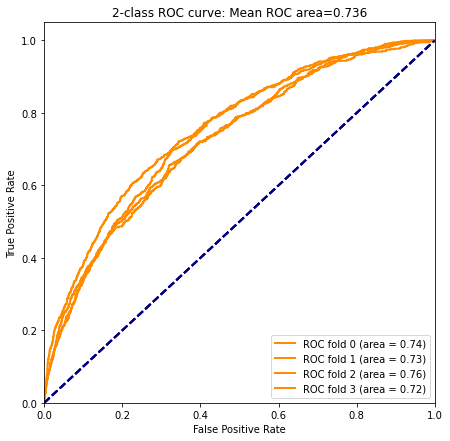

Wall time: 9.07 s


In [29]:
%%time

x_data = train_data.iloc[:,:230]
y_data = train_data.iloc[:,230:]
x_data = labelEncoder(x_data)
x_data = dropUninformative(x_data)

weights = [1.,1.]
print ('churn weight: '+ str(weights[0]) + '\nno churn weight: '+str(weights[1]))
gbm = lgb.LGBMClassifier(max_depth=3)
y_scores, y_tests = KFold(gbm, x_data, y_data, weights)
ROC(y_scores, y_tests)

#### labelEncoder, где количество уникальных значений меньше 100.

In [30]:
x_data = train_data.iloc[:,:230]
x_data.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230
9685,NaN,NaN,NaN,NaN,NaN,777.0,7.0,NaN,NaN,NaN,...,zCkv,catzS2D,M_8D,NaN,ELof,TNEC,ZI9m,ib5G6X1eUxUn6,am7c,NaN
13180,NaN,NaN,NaN,NaN,NaN,490.0,0.0,NaN,NaN,NaN,...,oslk,JAn7kpB,LM8l689qOp,NaN,NaN,3Cy4,RAYp,F2FyR07IdsN7I,NaN,NaN
19343,NaN,NaN,NaN,NaN,NaN,1344.0,7.0,NaN,NaN,NaN,...,oslk,XQvdByr,LM8l689qOp,NaN,NaN,7FJQ,RAYp,F2FyR07IdsN7I,NaN,NaN
26596,NaN,NaN,NaN,NaN,NaN,6041.0,7.0,NaN,NaN,NaN,...,oslk,e7bTQlu,LM8l689qOp,NaN,kG3k,TNEC,RAYp,F2FyR07IdsN7I,mj86,NaN
27409,NaN,NaN,NaN,NaN,NaN,714.0,14.0,NaN,NaN,NaN,...,zCkv,hHJsvbM,LM8l689qOp,NaN,xG3x,Aoh3,6fzt,SbOd7O8ky1wGNxp0Arj0Xs,mj86,NaN


churn weight: 1.0
no churn weight: 1.0


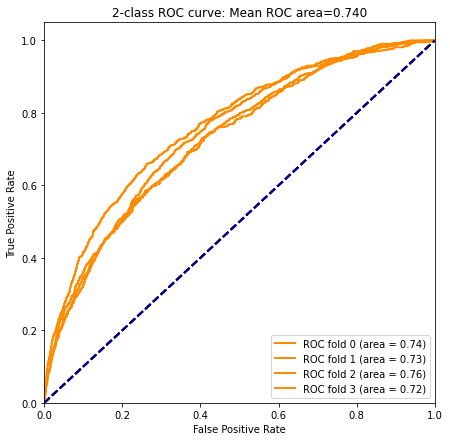

Wall time: 12.6 s


In [31]:
%%time
# labelEncoder там, где количество уникальных значений меньше 100
def labelEncoderVC(data):
    data = data.fillna(0)
    le = preprocessing.LabelEncoder()
    data_ret = data.iloc[:,:190]
    for m in range(190,230):
        if len(pd.unique(data.iloc[:,m]))>100:
            le.fit(data.iloc[:,m].astype(str))
            data_ret['Var'+str(m+1)] = le.transform(data.iloc[:,m].astype(str))
        else:
            data_ret = pd.concat([data_ret, pd.get_dummies(data.iloc[:,m])], axis = 1)
    return data_ret

x_data = train_data.iloc[:,:230]
y_data = train_data.iloc[:,230:]
x_data = labelEncoderVC(x_data)
x_data = dropUninformative(x_data)

weights = [1.,1.]
print ('churn weight: '+ str(weights[0]) + '\nno churn weight: '+str(weights[1]))
gbm = lgb.LGBMClassifier(max_depth=3)
y_scores, y_tests = KFold(gbm, x_data, y_data, weights)
ROC(y_scores, y_tests)

#### oneHotEncoder

churn weight: 1.0
no churn weight: 1.0


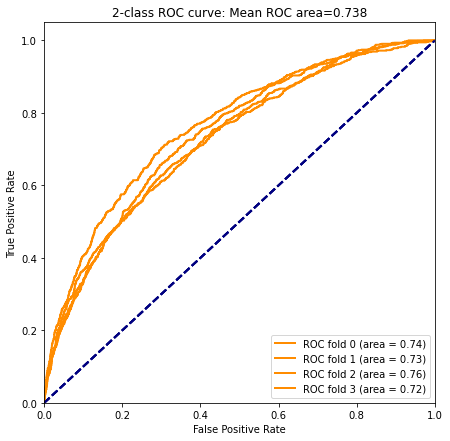

(40000, 768)
Wall time: 15.8 s


In [32]:
%%time


# oneHotEncoder
def labelEncoderVC2(data):
    data = data.fillna(0)
    le = preprocessing.LabelEncoder()
    data_ret = pd.DataFrame([])
    for i in range(190):
        if len(pd.unique(data.iloc[:,i]))>10:
            data_ret['Var'+str(i+1)] = data.iloc[:,i]
        else:
            data_ret = pd.concat([data_ret, pd.get_dummies(data.iloc[:,i])], axis = 1)

    for m in range(190,230):
        if len(pd.unique(data.iloc[:,m]))>100:
            le.fit(data.iloc[:,m].astype(str))
            data_ret['Var'+str(m+1)] = le.transform(data.iloc[:,m].astype(str))
        else:
            data_ret = pd.concat([data_ret, pd.get_dummies(data.iloc[:,m])], axis = 1)
    return data_ret
x_data = train_data.iloc[:,:230]
y_data = train_data.iloc[:,230:]
x_data = labelEncoderVC2(x_data)
x_data = dropUninformative(x_data)

weights = [1.,1.]
print ('churn weight: '+ str(weights[0]) + '\nno churn weight: '+str(weights[1]))
gbm = lgb.LGBMClassifier(max_depth=3)
y_scores, y_tests = KFold(gbm, x_data, y_data, weights)
ROC(y_scores, y_tests)
print (x_data.shape)

#### По результатам применение различных стратегий для обработки категориальных признаков не особо повлияли на качество обучения, далее буду использовать labelEncoder, быстрее считается и не перегружает датасет.

5\. Все ли признаки оказались полезными для построения моделей? Проведите процедуру отбора признаков, попробуйте разные варианты отбора (обратите внимание на модуль `sklearn.feature_selection`). Например, можно выбрасывать случайные признаки или строить отбор на основе l1-регуляризации - отфильтровать из обучения признаки, которые получат нулевой вес при построении регрессии с l1-регуляризацией (`sklearn.linear_model.Lasso`). И всегда можно придумать что-то своё=) Попробуйте как минимум 2 различные стратегии, сравните результаты. Помог ли отбор признаков улучшить качество модели? Поясните свой ответ.

#### L1-регуляризация.

(40000, 212)
churn weight: 1.0
no churn weight: 1.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5380.326284544789, tolerance: 1.1018342400000067
  model = cd_fast.enet_coordinate_descent(


(40000, 35)


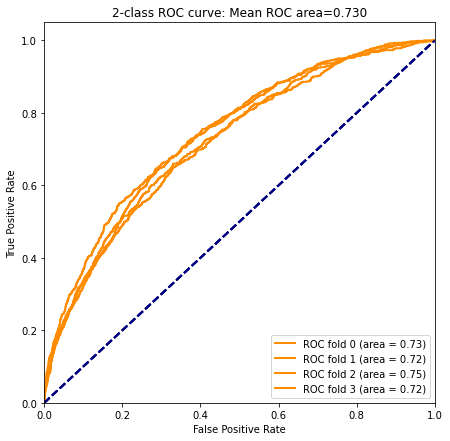

Wall time: 20.5 s


In [33]:
%%time
data = train_data.fillna(0)
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
data = train_data.fillna(0)

x_data = train_data.iloc[:,:230]
y_data = train_data.iloc[:,230:]
x_data = labelEncoder(x_data)
x_data = dropUninformative(x_data)
print (x_data.shape)
weights = [1.,1.]
print ('churn weight: '+ str(weights[0]) + '\nno churn weight: '+str(weights[1]))

lsvc = Lasso(alpha = 0.01).fit(x_data, y_data)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(x_data)
print (X_new.shape)

gbm = lgb.LGBMClassifier(max_depth=3)
y_scores, y_tests = KFold(gbm, pd.DataFrame(X_new), y_data, weights)
ROC(y_scores, y_tests)

#### Метод опорных векторов.

(40000, 212)
churn weight: 1.0
no churn weight: 1.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


(40000, 87)


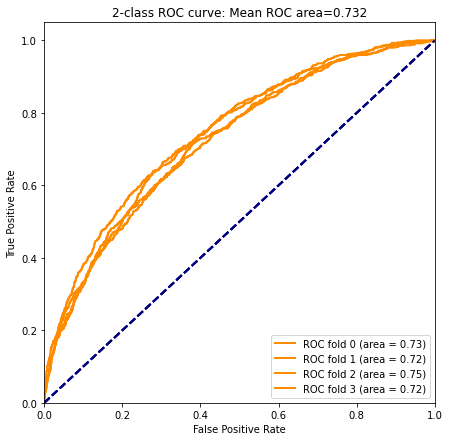

Wall time: 16.1 s


In [34]:
%%time

x_data = train_data.iloc[:,:230]
y_data = train_data.iloc[:,230:]
x_data = labelEncoder(x_data)
x_data = dropUninformative(x_data)
print (x_data.shape)
weights = [1.,1.]
print ('churn weight: '+ str(weights[0]) + '\nno churn weight: '+str(weights[1]))

lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(x_data, y_data)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(x_data)
print (X_new.shape)

gbm = lgb.LGBMClassifier(max_depth=3)
y_scores, y_tests = KFold(gbm, pd.DataFrame(X_new), y_data, weights)
ROC(y_scores, y_tests)

#### Ничего особо из этих стратегий не улучшает качество модели...

6\. Подберите оптимальные параметры модели. Обратите внимание, что в зависимости от того, как вы обработали исходные данные, сделали ли балансировку классов, сколько объектов оставили в обучающей выборке и др. оптимальные значения параметров могут меняться. Возьмите наилучшее из ваших решений на текущий момент и проведите процедуру подбора параметров модели (обратите внимание на `sklearn.model_selection.GridSearchCV`) Как подбор параметров повлиял на качество модели?

#### В итоге самые оптимальные параметры следующие:
##### соотношение классов как в исходном датасете
##### labelEncoder для категориальных признаков
##### удаление призников с малым количеством уникальных значений
##### соотношение весов 1:1

7\. Предложите методику оценки того, какие признаки внесли наибольший вклад в модель (например, это могут быть веса в случае регрессии, а также большое количество моделей реализуют метод `feature_importances_` - оценка важности признаков). На основе предложенной методики проанализируйте, какие признаки внесли больший вклад в модель, а какие меньший?

#### featureimportances

churn weight: 1.0
no churn weight: 1.0


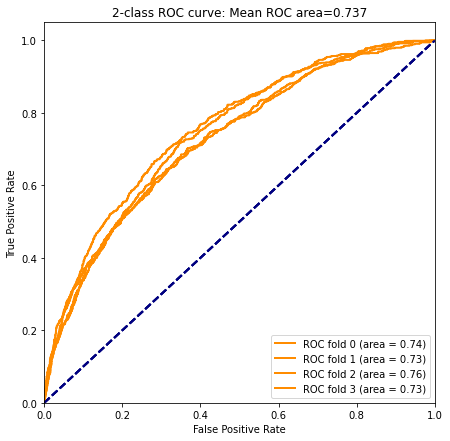

In [35]:
x_data = train_data.iloc[:,:230]
y_data = train_data.iloc[:,230:]
x_data = labelEncoder(x_data)
x_data = dropUninformative(x_data)

weights = [1.,1.]
print ('churn weight: '+ str(weights[0]) + '\nno churn weight: '+str(weights[1]))
gbm = lgb.LGBMClassifier(colsample_bytree= 1.0,
                            max_depth= 2,
                            min_child_weight= 1,
                            n_estimators= 170,
                            reg_alpha= 0.4,
                            reg_lambda= 1.0,
                            subsample= 1.0)
y_scores, y_tests = KFold(gbm, x_data, y_data, weights)
ROC(y_scores, y_tests)

,importance,labels
114,74,Var125
101,35,Var112
172,28,Var188
199,21,Var216
63,21,Var73
...,...,...
132,0,Var144
131,0,Var143
130,0,Var142
129,0,Var141


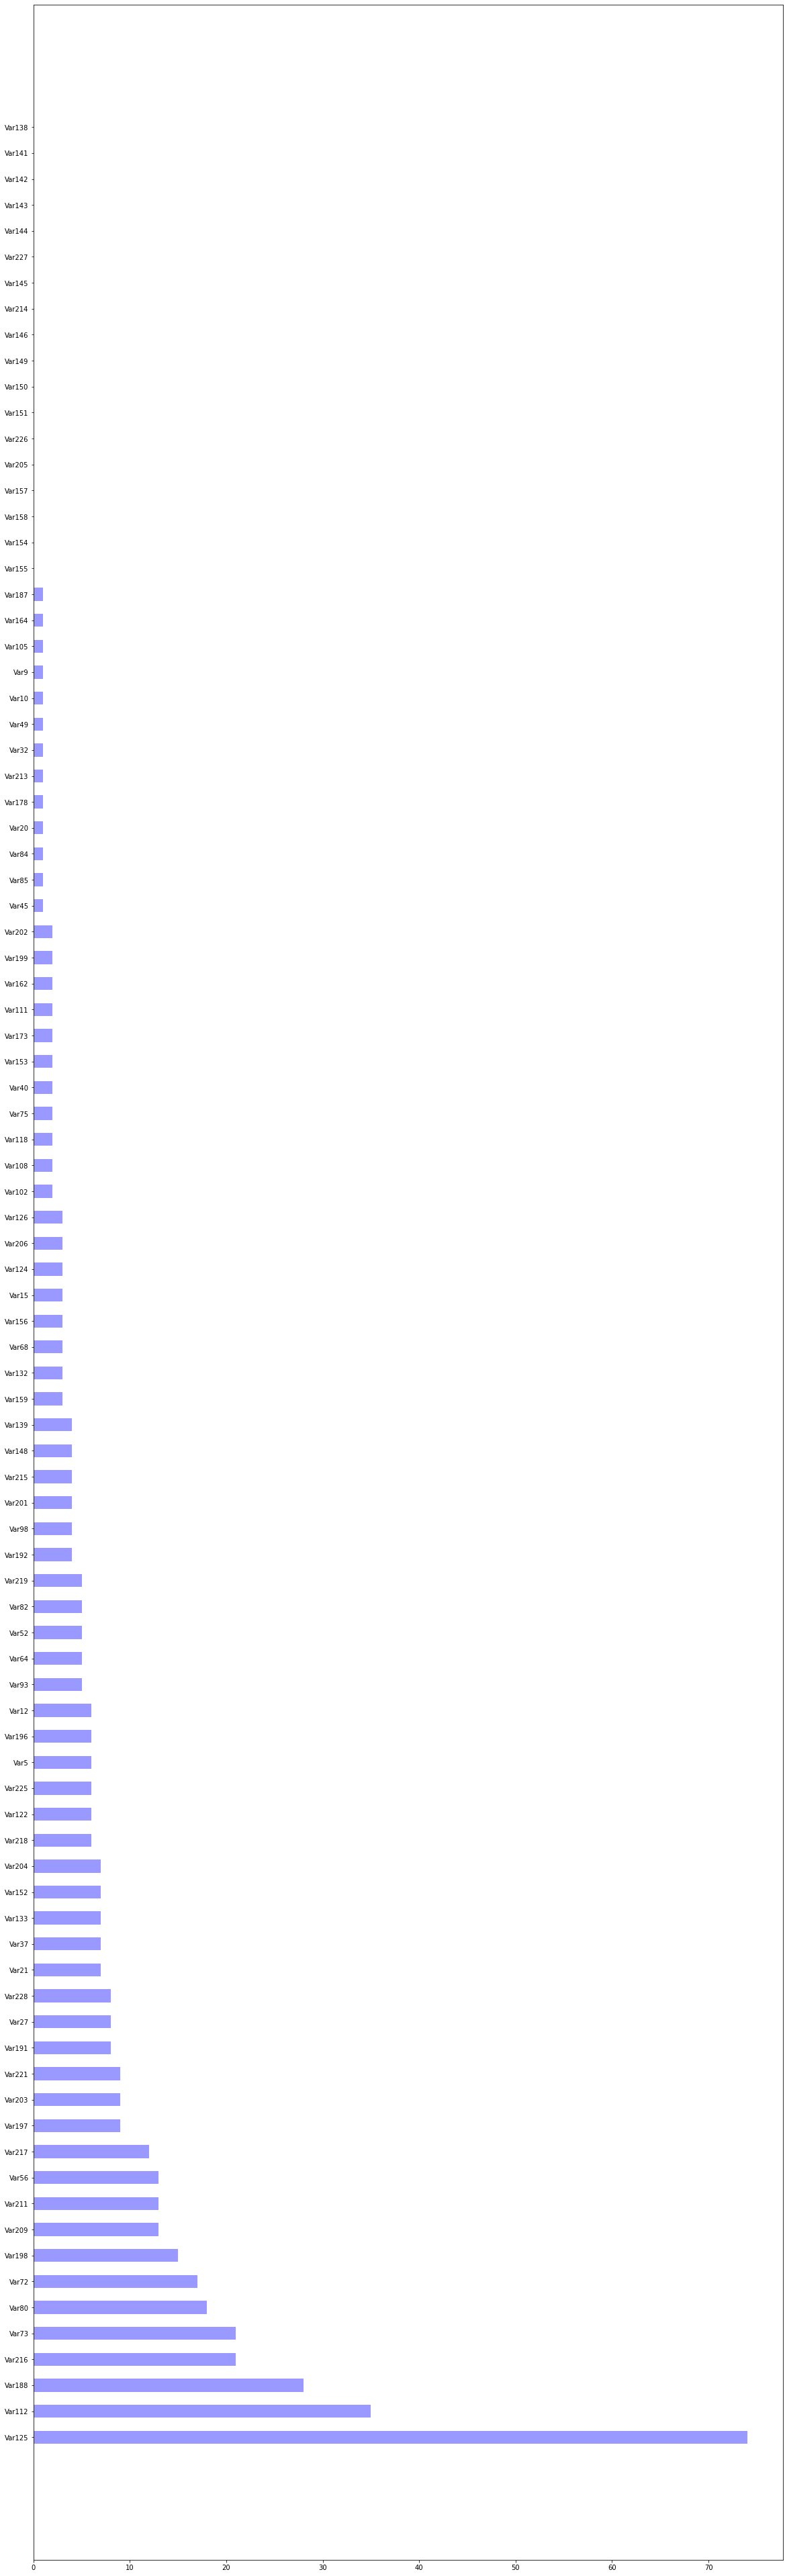

In [36]:
important_features = featureImportance(gbm, x_data)

#### Половина признаков показала себя как неинформативные...

#### 5 признаков с наибольшим вкладом.

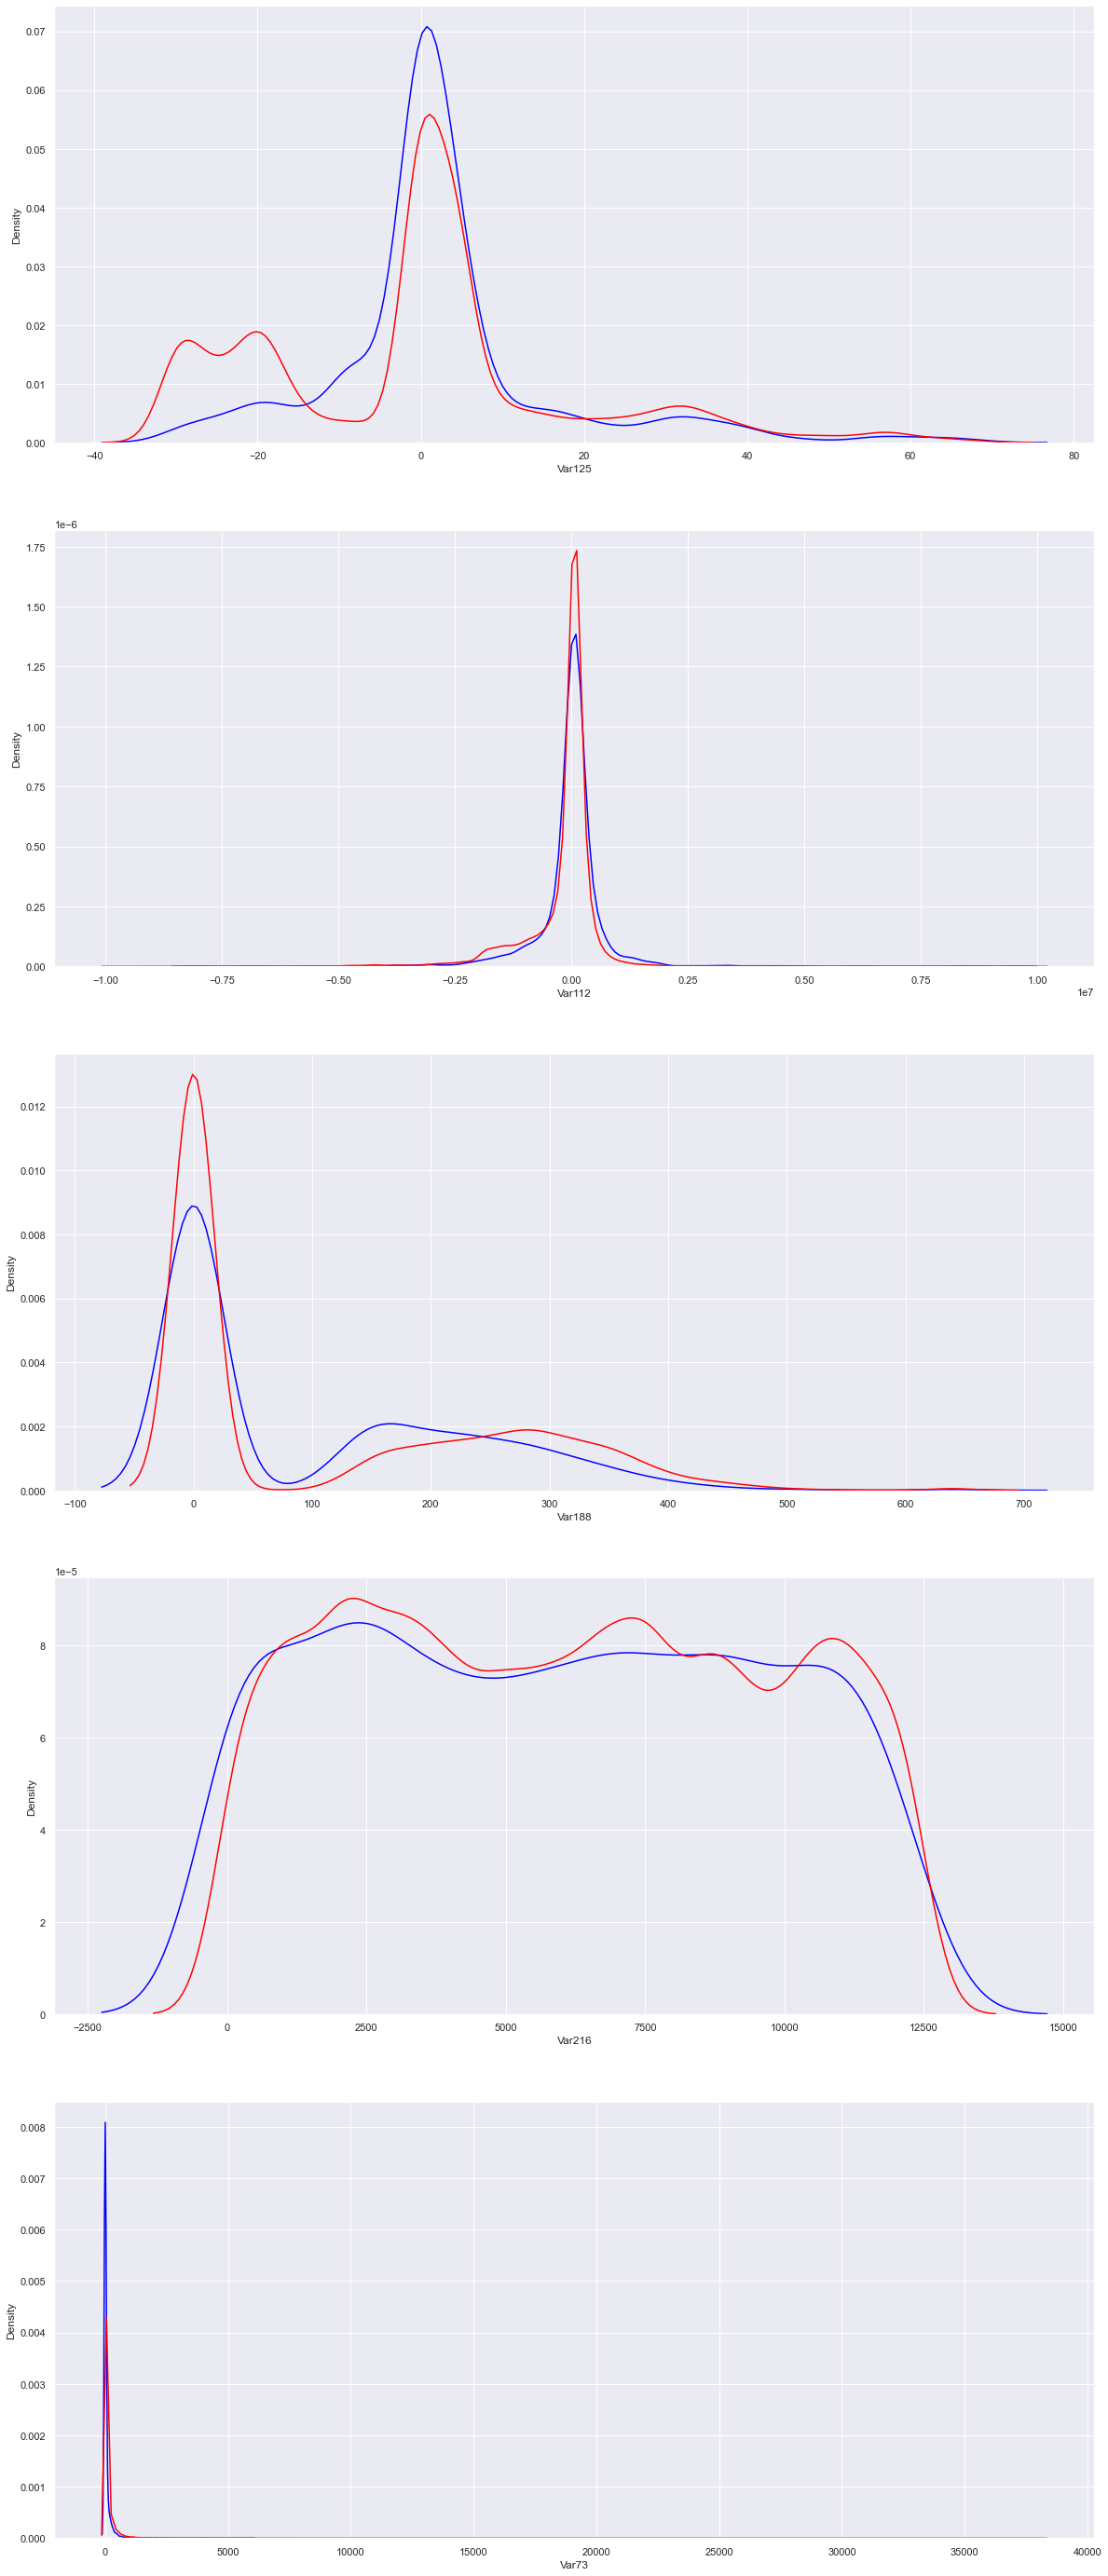

In [40]:
fig, axs = plt.subplots(5, figsize = (20,50))
sns.set(color_codes=True)
for ax, column in zip(axs, important_features['labels'][:5]):
    sns.kdeplot(x_data[column][y_data['labels'] == 1], ax = ax, color = "blue", label = str(column)+" label = 1")
    sns.kdeplot(x_data[column][y_data['labels'] == -1], ax = ax, color = "red", label = str(column)+" label = -1")

#### 5 признаков с наименьшим вкладом.

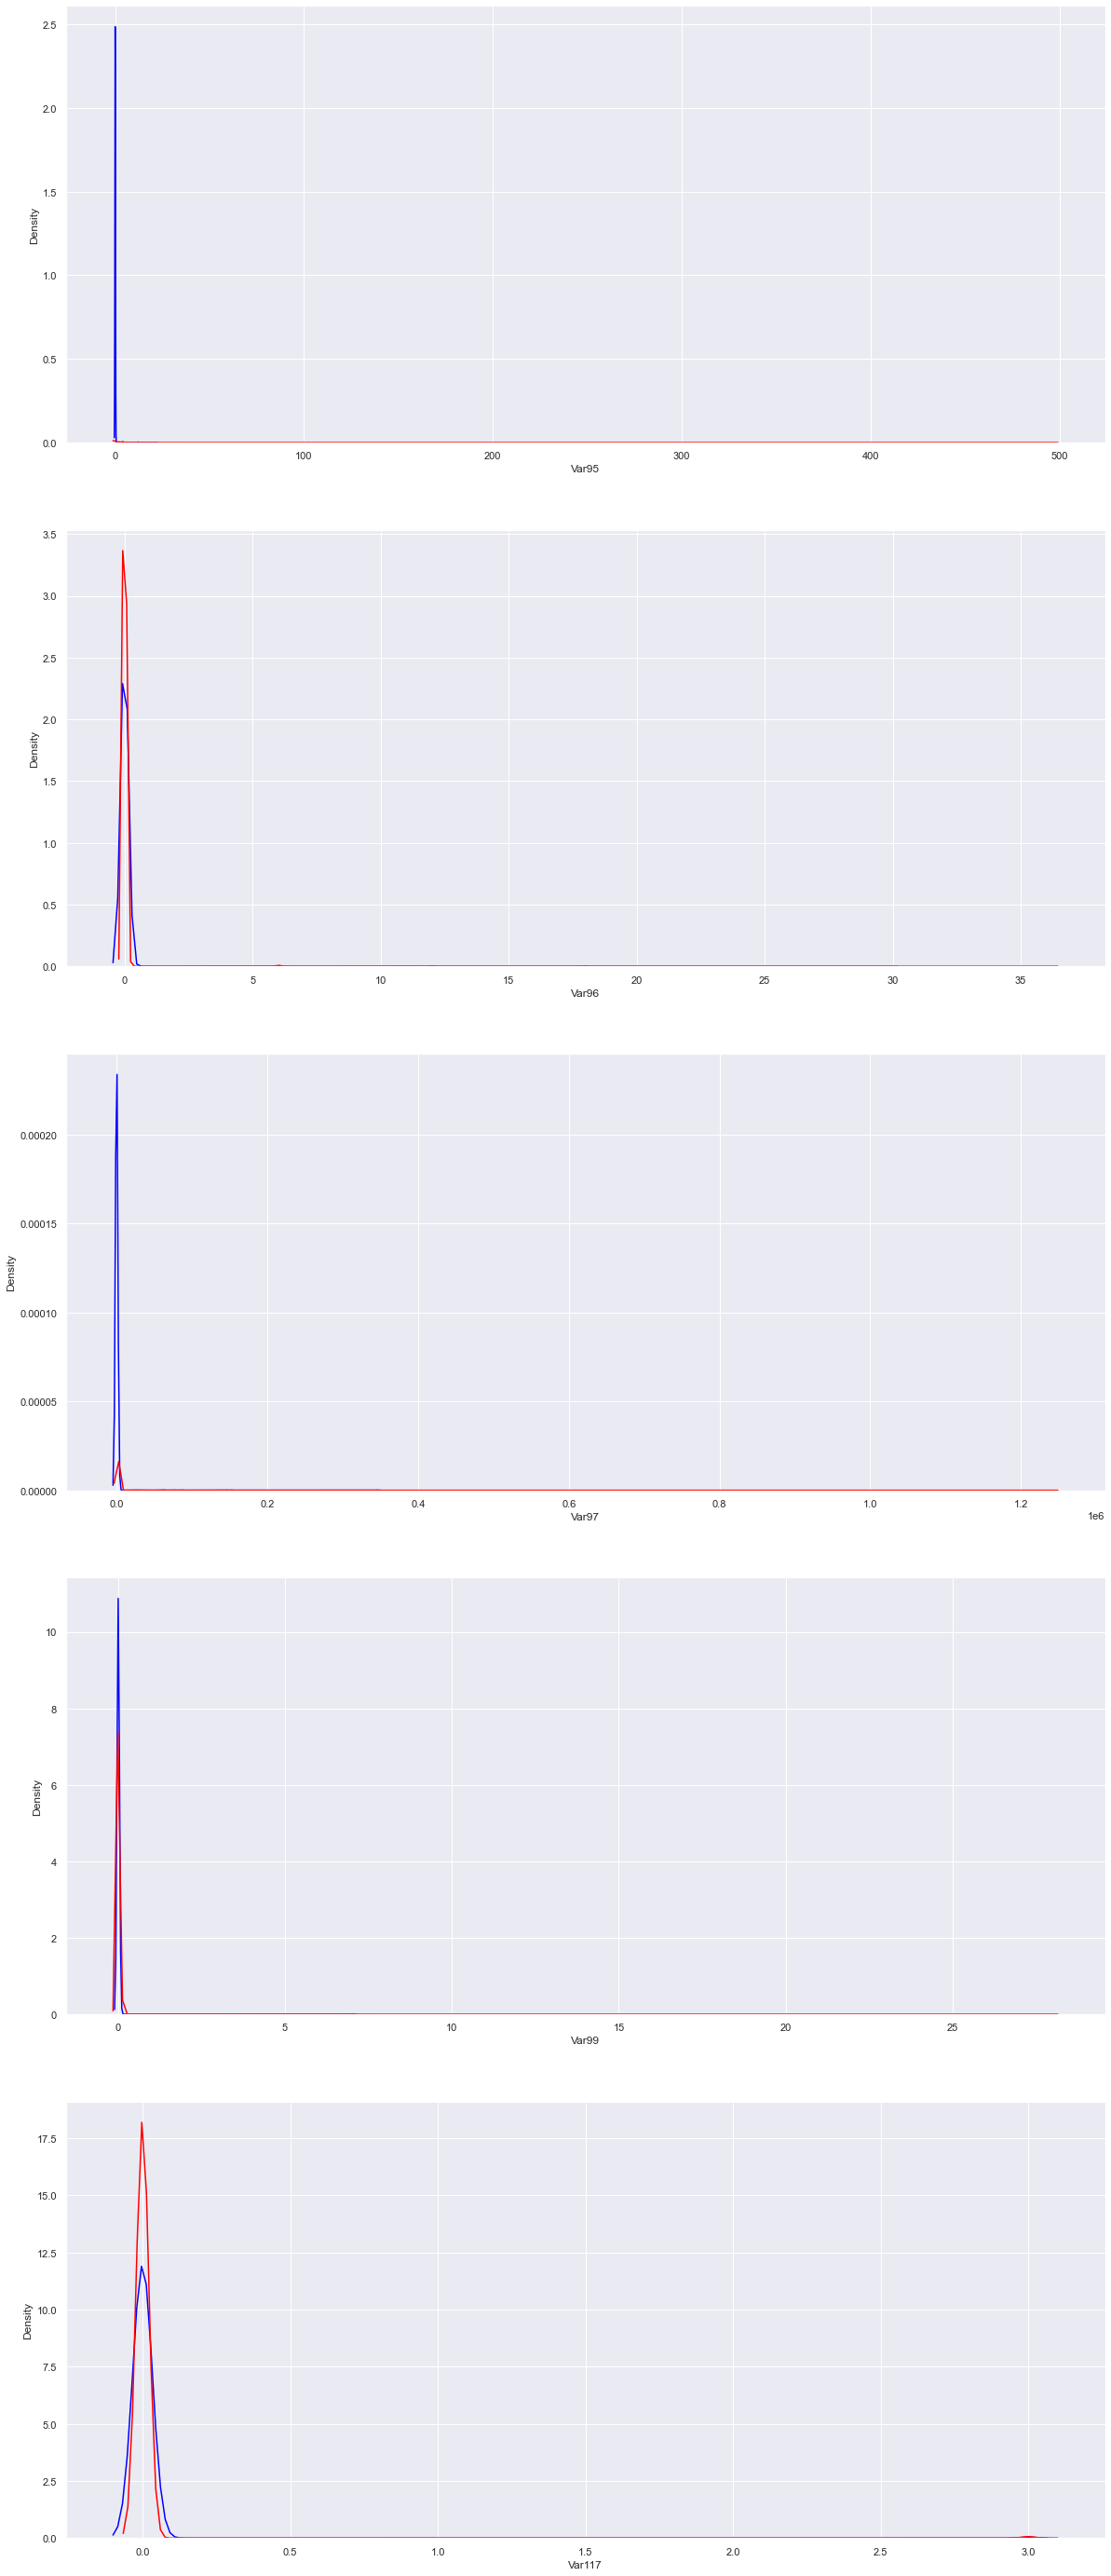

In [41]:
fig, axs = plt.subplots(5, figsize = (20,50))
sns.set(color_codes=True)
for ax, column in zip(axs, important_features['labels'][-5:]):
    sns.kdeplot(x_data[column][y_data['labels'] == 1], ax = ax, color = "blue", label = str(column)+" label = 1")
    sns.kdeplot(x_data[column][y_data['labels'] == -1], ax = ax, color = "red", label = str(column)+" label = -1")

8\. Напоследок давайте посмотрим на объекты. На каких объектах достигается наибольшая ошибка классификации? Есть ли межу этими объектами что-то общее? Видны ли какие-либо закономерности? Предположите, почему наибольшая ошибка достигается именно на этих объектах. В данном случае "наибольшую" ошибку можно понимать как отнесение объекта с чужому классу с большой долей уверенности (с высокой вероятностью).

In [42]:
data_with_predict = x_data
data_with_predict['labels'] = y_data
data_with_predict['predicted'] = gbm.predict(x_data.iloc[:,:212])
data_with_predict['probability'] = gbm.predict_proba(x_data.iloc[:,:212])[:,0]
def errorObjects(data, thresh_1, thresh_2):
    df_first_type_err = pd.DataFrame([])
    df_second_type_err = pd.DataFrame([])
    for sample in range(len(data)):
        if (data['labels'][sample] == 1.0) and (data['predicted'][sample] == -1.0):
            if abs(1-data['probability'][sample]) > thresh_1:
                df_first_type_err = df_first_type_err.append(data.loc[sample])
        if (data['labels'][sample] == -1.0) and (data['predicted'][sample] == 1.0):
            if abs(data['probability'][sample]) > thresh_2:
                df_second_type_err = df_second_type_err.append(data.loc[sample])
    print ('size of first type error samples: ' + str(len(df_first_type_err)))
    print ('size of second type error samples: ' + str(len(df_second_type_err)))
    return(df_first_type_err, df_second_type_err)
first_type_err, second_type_err = errorObjects(data_with_predict, 0.3, 0.001)

size of first type error samples: 200
size of second type error samples: 10


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


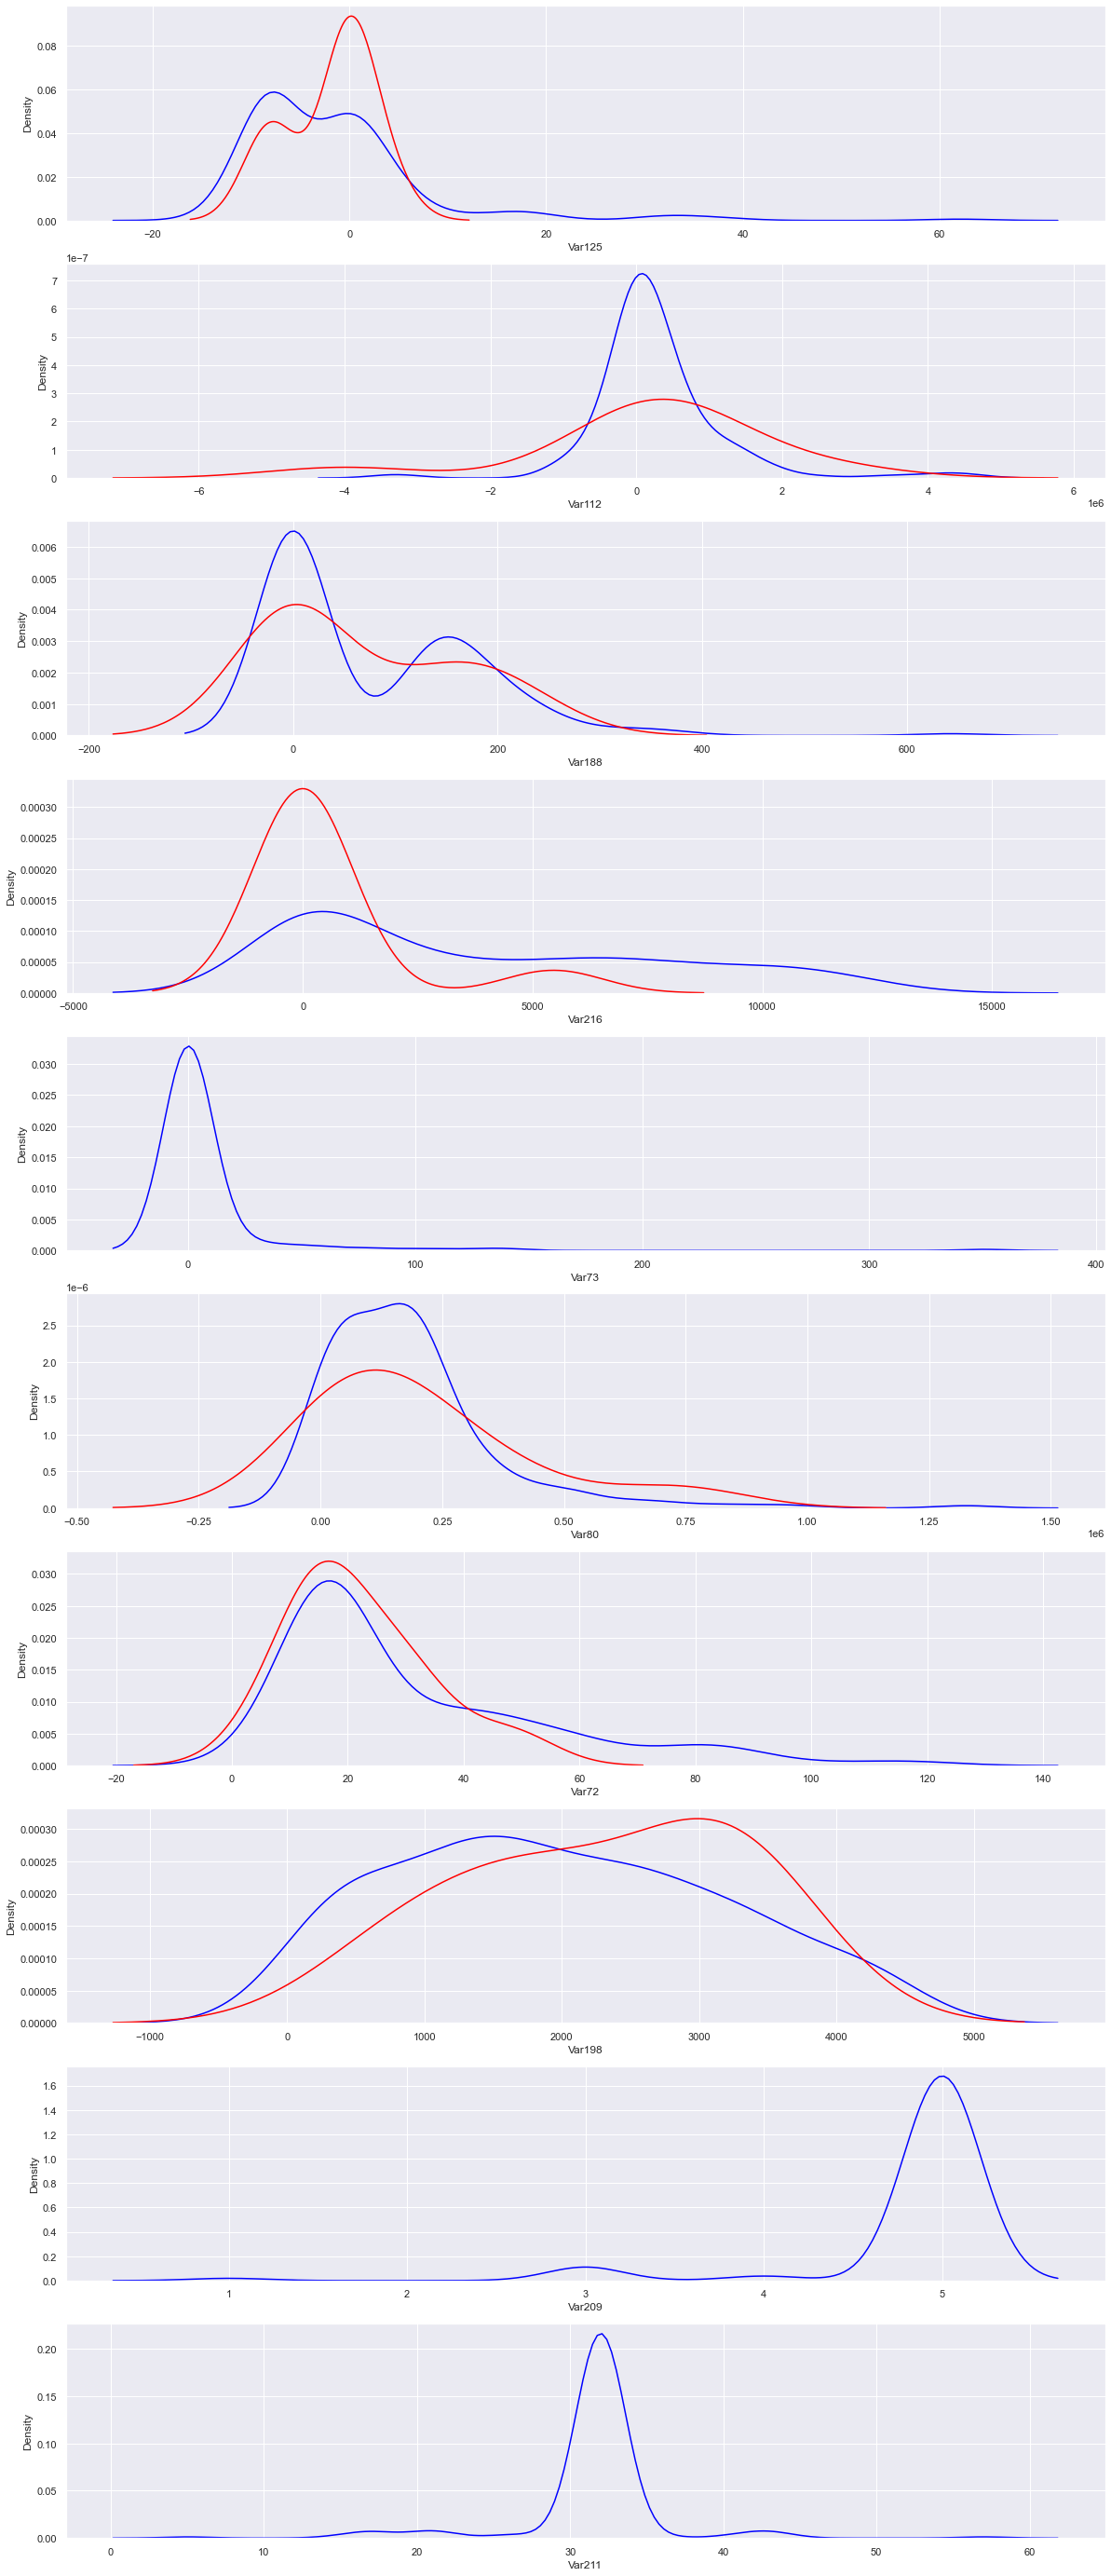

In [44]:
  fig, axs = plt.subplots(10, figsize = (20,50))
sns.set(color_codes=True)
for ax, column in zip(axs, important_features.iloc[:10,1]):
    sns.kdeplot(first_type_err[column][y_data['labels'] == 1], ax = ax, color = "blue", label = str(column)+" label = 1")
    sns.kdeplot(second_type_err[column][y_data['labels'] == -1], ax = ax, color = "red", label = str(column)+" label = -1")

#### Часто ошибки второго рода возникают на выбросах, если с ними разобраться и убрать их из выборки, можно улучшить качество модели.

9\. По итогам проведенных экспериментов постройте финальную решение - модель с наилучшим качеством. Укажите, какие преобразования данных, параметры и пр. вы выбрали для построения финальной модели.

#### Oversampling и/или UnderSampling не применяется, количество объектов как в исходном датасете.
#### LabelEncoder для категориальных признаков.
#### Удалены малоинформативные признаки с повторяющимися значениями.
#### финальная модель построена на 25 наиболее информативных признаках.

churn weight: 1.0
no churn weight: 1.0


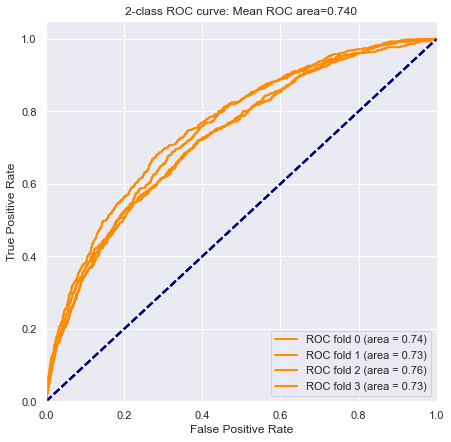

In [51]:
x_data = train_data.iloc[:,:230]
y_data = train_data.iloc[:,230:]
x_data = labelEncoder(x_data)
x_data = dropUninformative(x_data)

weights = [1.,1.]
print ('churn weight: '+ str(weights[0]) + '\nno churn weight: '+str(weights[1]))
gbm = lgb.LGBMClassifier(colsample_bytree= 1.0,
                            max_depth= 2,
                            min_child_weight= 1,
                            n_estimators= 170,
                            reg_alpha= 0.4,
                            reg_lambda= 1.0,
                            subsample= 1.0)
y_scores, y_tests = KFold(gbm, x_data[important_features['labels'][:25]], y_data, weights)

ROC(y_scores, y_tests)

10\. Подумайте, можно ли еще улучшить модель? Что для этого можно сделать? 

#### Нет предела совершенству:) всегда можно повыбирать параметры ещё, плюс убрать выбросы.